# Imports

In [1]:
# Common
import time
import os
import csv
import numpy as np

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image Processing
import cv2
from PIL import Image

# Constant

In [2]:
BASE_IMGS_PATH = '/kaggle/input/ipcv-personal'

# Utils

In [3]:
def get_image_paths(directory, valid_extensions=(".jpg", ".jpeg", ".png", ".bmp", ".gif")):
    image_paths = []
    
    # Iterate over all files in the directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if file is an image based on its extension
            if file.lower().endswith(valid_extensions):
                # Append the full path of the image file to the list
                image_paths.append(os.path.join(root, file))
    
    return image_paths


def plot_image_grid(images, images_per_row=5, total_images=50, fig_size=None):
    # Ensure we don't exceed the available images or the limit of 50
    total_images = min(total_images, len(images))
    
    # Calculate the number of rows needed
    num_rows = (total_images + images_per_row - 1) // images_per_row
    
    # Create a figure with a grid of subplots
    fig_size = fig_size if fig_size else (15, 3 * num_rows)
    fig, axs = plt.subplots(num_rows, images_per_row, figsize=fig_size)

    # Flatten the axes array in case of more than one row
    axs = axs.ravel()

    for i in range(total_images):
        # Read and display the image
        img = images[i]
        axs[i].imshow(img)
        axs[i].axis('off')  # Turn off the axis for clean presentation

    # Turn off any remaining unused subplots (if total_images < images_per_row * num_rows)
    for j in range(total_images, len(axs)):
        axs[j].axis('off')

    # Show the grid of images
    plt.tight_layout()
    plt.show()

    
def plt_img(image, cmap="gray"):
    """Display an image using matplotlib"""
    plt.imshow(image, cmap)
    plt.axis('on')
    plt.show()
    
    
def read_rgb_images(imgs_paths):
    images = []
    
    for path in imgs_paths:
        image = plt.imread(path)
        images.append(image)
    return images

# Step1: Read & Visualize Images¶

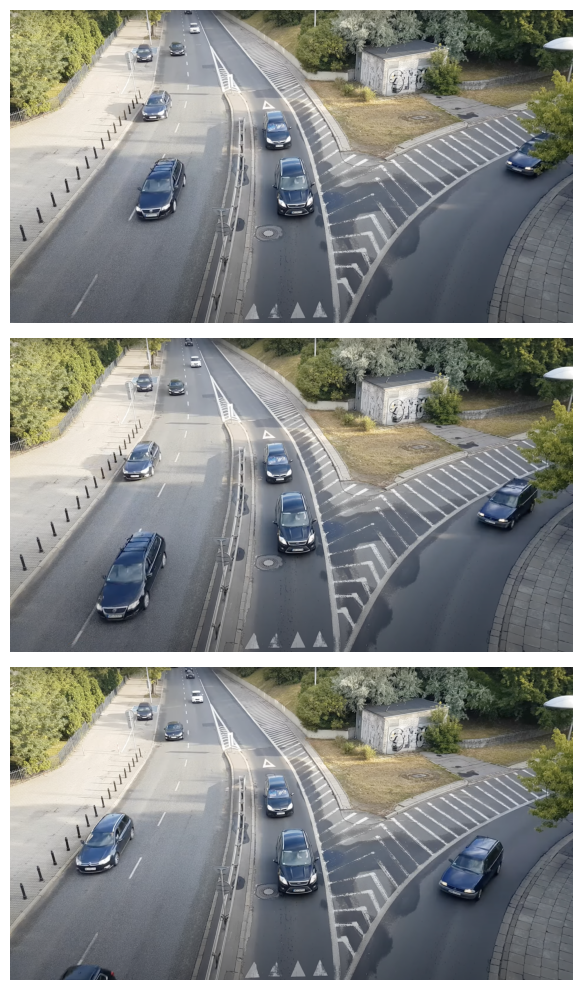

In [4]:
image_paths = get_image_paths(BASE_IMGS_PATH)
rgb_imgs = read_rgb_images(image_paths)
plot_image_grid(rgb_imgs, images_per_row=1, fig_size=(15,10))

In [5]:
type(rgb_imgs[0])

numpy.ndarray

# Step2: Background Subtraction

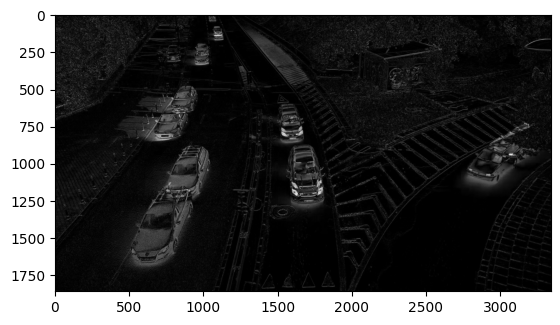

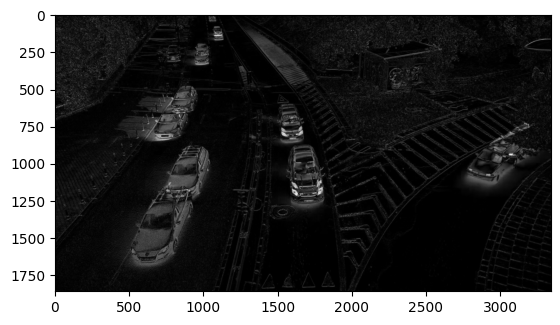

In [6]:
gray_image1 = cv2.cvtColor(rgb_imgs[0], cv2.COLOR_RGB2GRAY)
gray_image2 = cv2.cvtColor(rgb_imgs[1], cv2.COLOR_RGB2GRAY)

# Calculate the absolute difference between the two frames
diff = cv2.absdiff(gray_image2, gray_image1)

# Define a 3x3 smoothing kernel
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=np.float32) / 9  # Normalize the kernel by dividing by 9

# Apply the smoothing kernel to the 'diff' image
smoothed_diff = cv2.filter2D(diff, -1, kernel)

plt_img(diff)
plt_img(smoothed_diff)

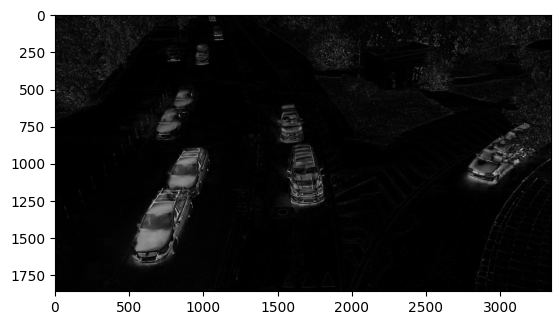

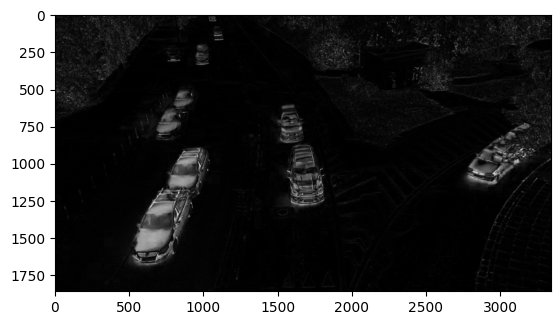

In [7]:
# Convert images to HSV and use the S (saturation) channel
hsv_image1 = cv2.cvtColor(rgb_imgs[0], cv2.COLOR_RGB2HSV)
hsv_image2 = cv2.cvtColor(rgb_imgs[1], cv2.COLOR_RGB2HSV)

# Extract the S channel from each frame (less affected by brightness)
s_channel1 = hsv_image1[:, :, 1]
s_channel2 = hsv_image2[:, :, 1]

# Compute the absolute difference between S channels of consecutive frames
diff = cv2.absdiff(s_channel2, s_channel1)

smoothed_diff = cv2.blur(diff, (5, 5))

plt_img(diff)
plt_img(smoothed_diff)